In [1]:
import numpy as np
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

class SignalInterpolation:
    def __init__(self, B=400, fm1=200, fm2=80):
        self.B = B  # Filter bandwidth in Hz
        self.Ts = 1 / (200 * np.pi * self.B)  # Generation rate (Time step)
        self.Fs = 1 / self.Ts  # Sampling frequency

        self.N = 10000  # Number of samples
        self.tf = self.N * self.Ts  # Final time
        self.t = np.arange(-self.tf, self.tf, self.Ts)  # Time axis

        self.Am = 2 * self.Ts * self.B  # Signal amplitude
        self.s = self.Am * np.sinc(2 * self.B * self.t)  # Sinc

        self.m = np.cos(2 * np.pi * fm1 * self.t) + np.cos(2 * np.pi * fm2 * self.t)  # Signal m(t)

    def perform_convolution(self):
        c = np.convolve(self.s, self.m)  # Calculate convolution
        c = c[(len(self.t)) // 2:3 * (len(self.t)) // 2]  # Adjust vector size (/2)
        return c

    @staticmethod
    def calculate_fft(signal):
        lfft = len(signal)  # FFT length
        return fftshift(fft(signal, lfft) / lfft)  # Shifted and normalized FFT

    def plot_signals(self, c):
        freq = np.arange(-self.Fs / 2, self.Fs / 2 - self.Fs / len(self.s), self.Fs / len(self.s))  # Frequency axis

        plt.figure(figsize=[10, 7])
        plt.subplot(321)
        plt.title("Original Signal")
        plt.plot(self.t, self.m)
        plt.xlim([-0.05, 0.05])

        plt.subplot(322)
        plt.title("Original Signal Spectrum")
        plt.plot(freq, np.abs(self.calculate_fft(self.m)))
        plt.xlim([-500, 500])

        plt.subplot(323)
        plt.title("Sinc Interpolation with B=400Hz")
        plt.plot(self.t, self.s)
        plt.xlim([-0.05, 0.05])

        plt.subplot(324)
        plt.title("Sinc Interpolation Spectrum with B=400Hz")
        plt.plot(freq, np.abs(self.calculate_fft(self.s)))
        plt.xlim([-500, 500])

        plt.subplot(325)
        plt.title("Regenerated Signal by Filtering B=400Hz")
        plt.plot(self.t, c)
        plt.xlim([-0.05, 0.05])

        plt.subplot(326)
        plt.title("Regenerated Signal Spectrum by Filtering with B=400Hz")
        plt.plot(freq, np.abs(self.calculate_fft(c)))
        plt.xlabel("Frequency [Hz]")
        plt.xlim([-500, 500])

        plt.tight_layout(pad=1.1)
        plt.show()

    def run(self):
        c = self.perform_convolution()
        self.plot_signals(c)

# Full reconstruction
Filter with B=400Hz, twice the value of the highest frequency of the signal m(t).

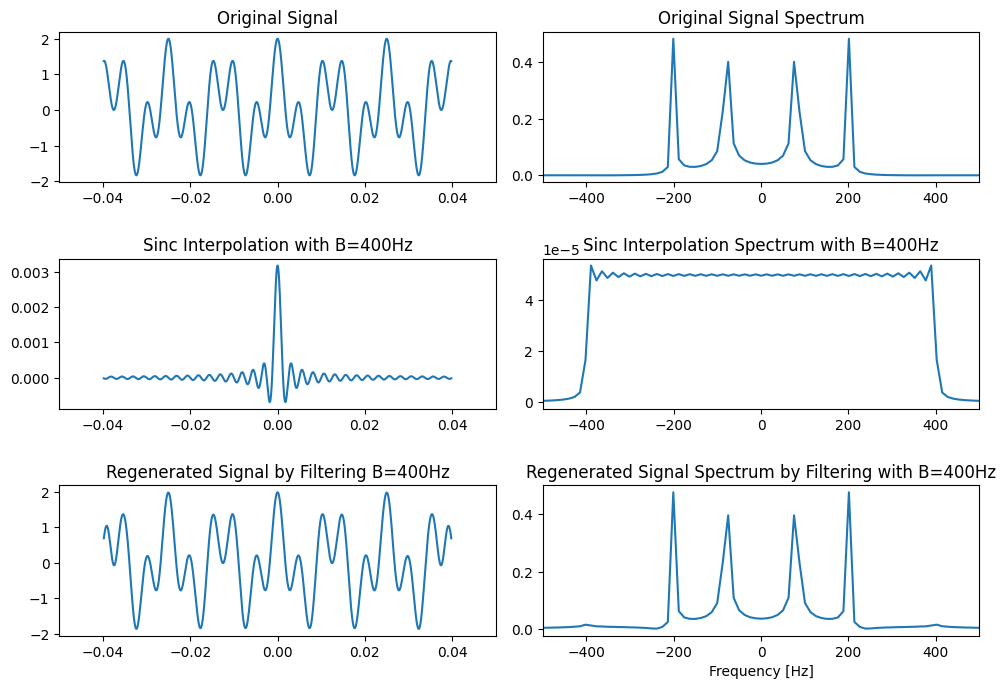

In [2]:
signal_interpolation = SignalInterpolation(B=400, fm1=200, fm2=80)
signal_interpolation.run()

# Partial reconstruction
Filter with B=200Hz, the same value of the highest frequency of the signal m(t).

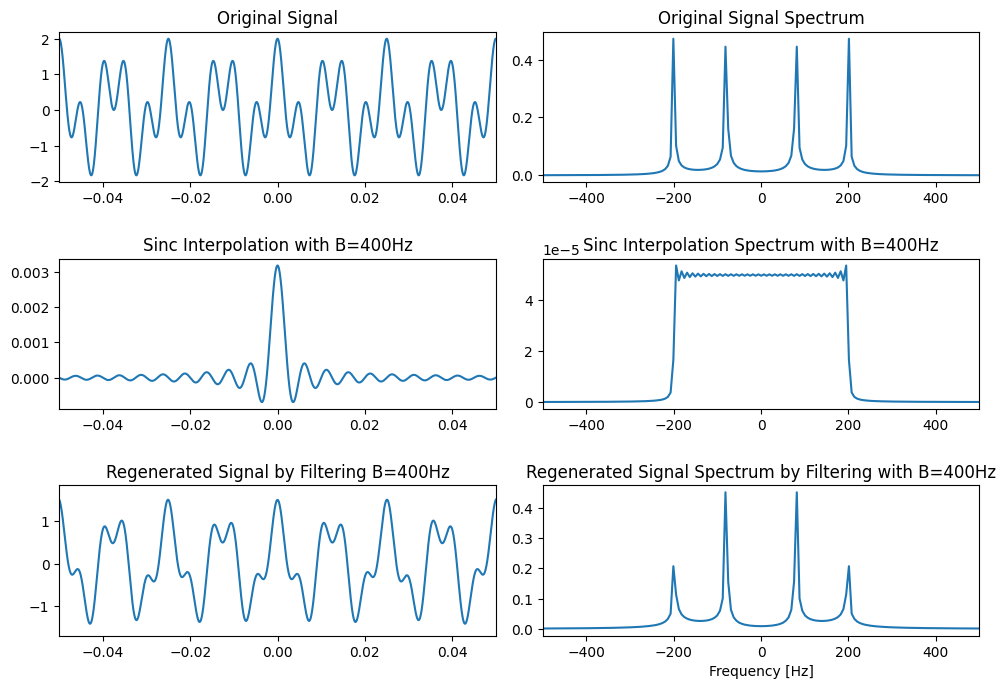

In [3]:
signal_interpolation = SignalInterpolation(B=200, fm1=200, fm2=80)
signal_interpolation.run()